In [1]:
#Stock Market Analysis

In [2]:
# Stocks data #
# The stock data for Systems Ltd, NETSOL, PTCL, and Avanceon for the year 2018 will be used for this analysis. Any stock data has six important columns.

# Time: The date and time of the day

# Open: The price of the stock at the start of the day when the market opens

# High: The highest price of the stock on that day

# Low: The lowest price of the stock on that day

# Close: The price of the stock at the end of the day when the market closes

# Volume: The number of stocks traded that day

# Let’s look up the stocks data for Systems Ltd.

In [3]:
import pandas as pd

sys = pd.read_csv(r'SYS.csv') 
#The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
print(sys)

             Time    Open    High     Low   Close  Volume
0     Jan 1, 2018   75.50   75.50   75.00   75.00    4000
1     Jan 2, 2018   74.85   76.00   73.11   75.32  197500
2     Jan 3, 2018   74.03   74.60   72.30   72.75   21000
3     Jan 4, 2018   71.03   74.50   71.03   74.01  381500
4     Jan 5, 2018   74.35   77.00   71.00   76.52  180500
..            ...     ...     ...     ...     ...     ...
238  Dec 24, 2018  106.00  110.00  106.00  109.60  126500
239  Dec 26, 2018  108.74  112.00  107.00  108.14   87000
240  Dec 27, 2018  110.49  110.49  107.00  108.61  400000
241  Dec 28, 2018  109.99  113.00  103.18  106.37  449000
242  Dec 31, 2018  105.88  110.50  105.75  109.87  408500

[243 rows x 6 columns]


<AxesSubplot:xlabel='Time'>

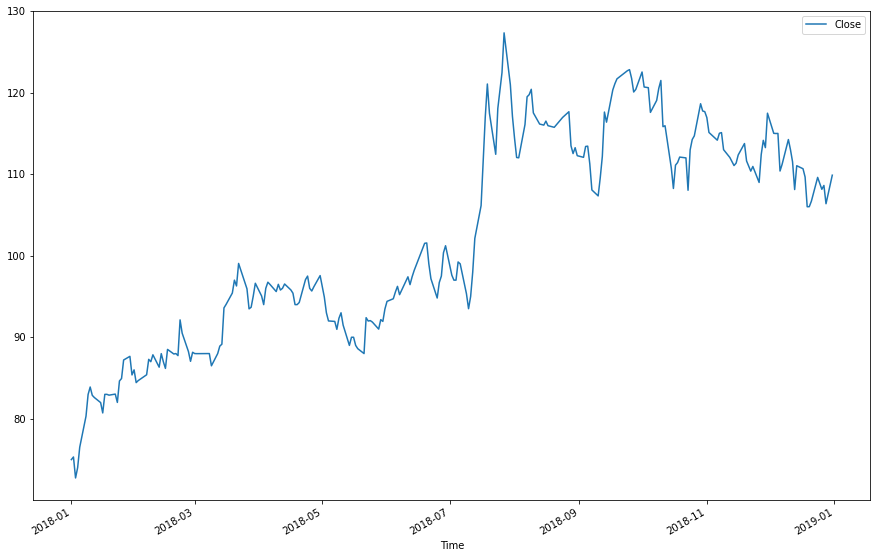

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv') 
#The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".

sys['Time'] = pd.to_datetime(sys.Time) # correct the format of date

sys = sys.set_index('Time') # Set Time column as row index

sys['Close'].plot(legend = True, figsize=(15,10))

              Open    High     Low   Close  Volume  mv_avg for 50 days
Time                                                                  
2018-01-01   75.50   75.50   75.00   75.00    4000                 NaN
2018-01-02   74.85   76.00   73.11   75.32  197500                 NaN
2018-01-03   74.03   74.60   72.30   72.75   21000                 NaN
2018-01-04   71.03   74.50   71.03   74.01  381500                 NaN
2018-01-05   74.35   77.00   71.00   76.52  180500                 NaN
...            ...     ...     ...     ...     ...                 ...
2018-12-24  106.00  110.00  106.00  109.60  126500            112.4658
2018-12-26  108.74  112.00  107.00  108.14   87000            112.3122
2018-12-27  110.49  110.49  107.00  108.61  400000            112.1658
2018-12-28  109.99  113.00  103.18  106.37  449000            112.0784
2018-12-31  105.88  110.50  105.75  109.87  408500            112.1110

[243 rows x 6 columns]


<AxesSubplot:xlabel='Time'>

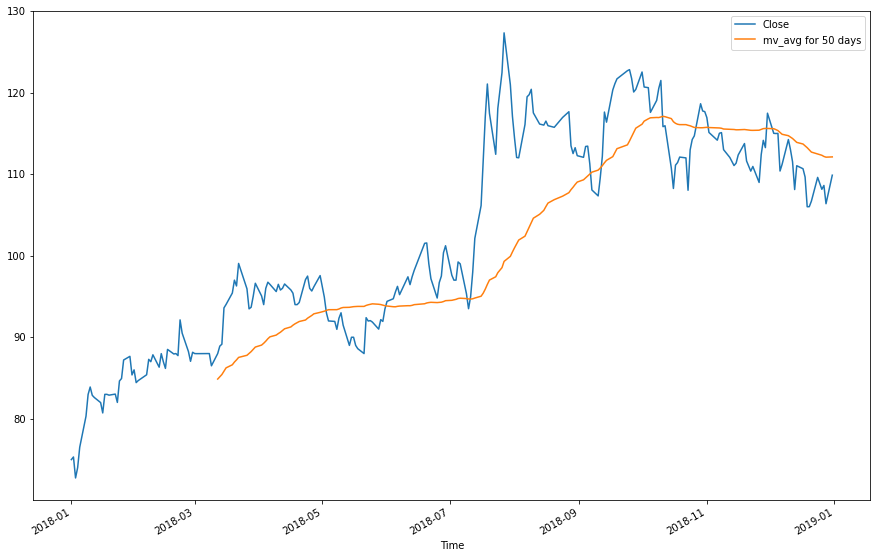

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv') #The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
sys['Time'] = pd.to_datetime(sys.Time) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index

days = 50 # Moving average window
col_name = "mv_avg for " + str(days) + " days" # New column to store moving average vlues

sys[col_name] = sys['Close'].rolling(days).mean() #Calculating moving average

print(sys)

sys[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10)) # Plotting the closing price with moving avarage for comprison

In [7]:
#Moving average comparisons #

<AxesSubplot:xlabel='Time'>

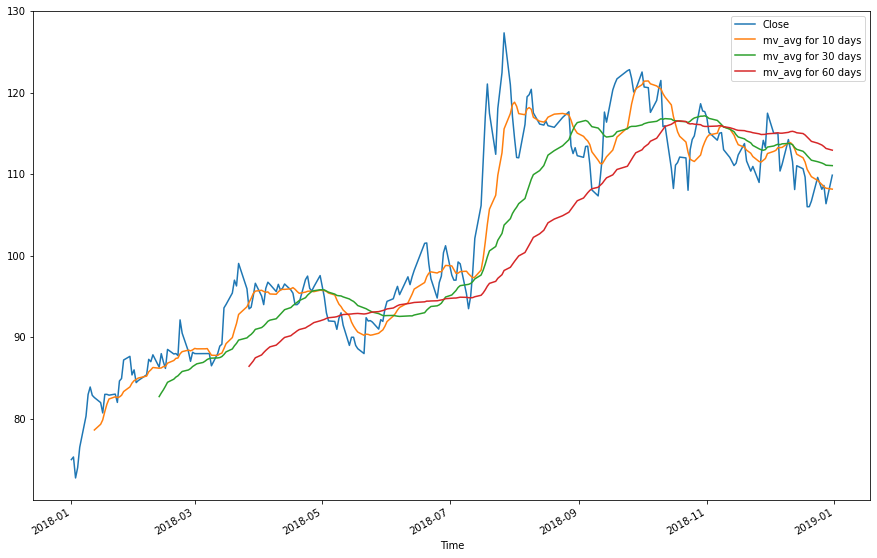

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv') #The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
sys['Time'] = pd.to_datetime(sys.Time)
sys = sys.set_index('Time')


days = [10, 30 , 60] # Multiple number of days
for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    sys[col_name] = sys['Close'].rolling(day).mean()
    
sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize=(15,10))

#We don’t need to figure out the formula or steps for calculating the daily returns because pandas already provides a built-in function for it. The pct_change function is called from a Series object, and it calculates the daily return for all rows based on the current and previous row value. This function returns a new Series with the calculated daily returns. The first row has no, or NaN, value as there is no previous value for it.

In [9]:
#Calculating daily returns #

<AxesSubplot:xlabel='Time', ylabel='Percentage Change'>

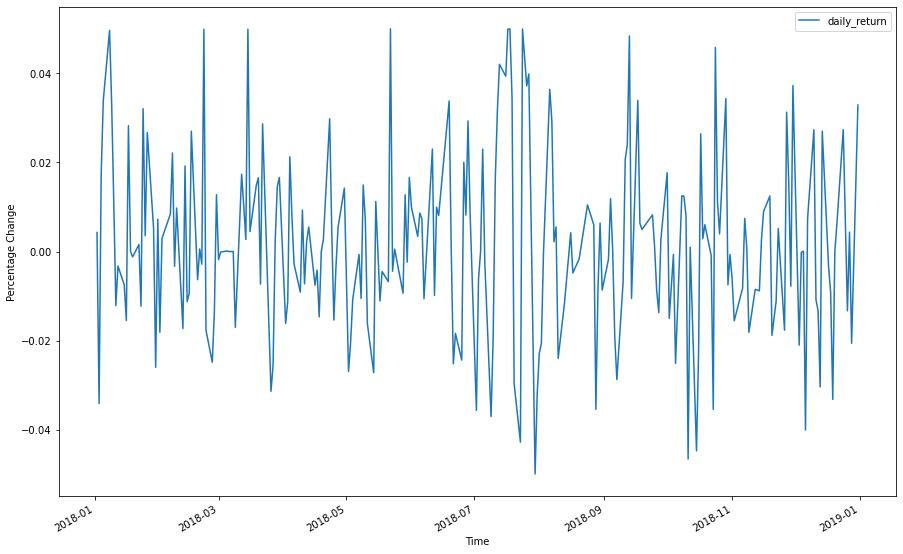

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv') 
#The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
sys['Time'] = pd.to_datetime(sys.Time) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index

daily_return = sys['Close'].pct_change() # Calculate the daily returns

sys['daily_return'] = daily_return # Create new column and assign daily return values to it

plt.ylabel('Percentage Change') # Assign a name to the y-axis of plot

sys['daily_return'].plot(legend = True, figsize=(15,10)) # plot the daily return values

In [11]:
#Estimating daily return #

C:\Users\krajm\AppData\Local\conda\conda\envs\wradlib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Value'>

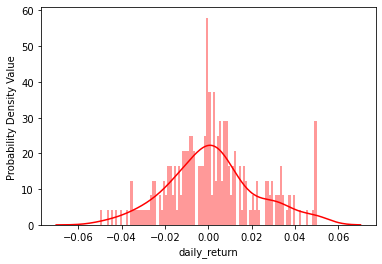

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys = pd.read_csv('SYS.csv') 
#The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
sys['Time'] = pd.to_datetime(sys.Time) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index

daily_return = sys['Close'].pct_change() # Calculate the daily returns

sys['daily_return'] = daily_return # Create new column and assign daily return values to it

plt.ylabel('Probability Density Value') # Assign a name to the y-axis of plot

sns.distplot(sys['daily_return'].dropna(), bins = 100, color = 'red') # plots a distribution graph of KDE and histogram 

In [16]:
#Correlation score #
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys = pd.read_csv('SYS.csv')
ns = pd.read_csv('NETSOL.csv')
ptc = pd.read_csv('PTC.csv')
avn = pd.read_csv('AVN.csv') 

sys['Time'] = pd.to_datetime(sys.Time)
ns['Time'] = pd.to_datetime(ns.Time)
ptc['Time'] = pd.to_datetime(ptc.Time)
avn['Time'] = pd.to_datetime(avn.Time)

sys = sys.set_index('Time')
ns = ns.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')

## Try printing the data of any company
print(sys)

              Open    High     Low   Close  Volume
Time                                              
2018-01-01   75.50   75.50   75.00   75.00    4000
2018-01-02   74.85   76.00   73.11   75.32  197500
2018-01-03   74.03   74.60   72.30   72.75   21000
2018-01-04   71.03   74.50   71.03   74.01  381500
2018-01-05   74.35   77.00   71.00   76.52  180500
...            ...     ...     ...     ...     ...
2018-12-24  106.00  110.00  106.00  109.60  126500
2018-12-26  108.74  112.00  107.00  108.14   87000
2018-12-27  110.49  110.49  107.00  108.61  400000
2018-12-28  109.99  113.00  103.18  106.37  449000
2018-12-31  105.88  110.50  105.75  109.87  408500

[243 rows x 5 columns]


In [17]:
#correlation with closing price
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

print("The New DataFrame\n", df.head())

corr = (df.dropna()).corr() # Calculating correlation after dropping null values

print("The correlations\n", corr)

The New DataFrame
               SYS  NETSOL    PTC    AVN
Time                                   
2018-01-01  75.00   64.38  13.34  35.18
2018-01-02  75.32   65.38  13.21  35.07
2018-01-03  72.75   64.00  13.12  35.29
2018-01-04  74.01   65.90  13.74  35.52
2018-01-05  76.52   67.54  13.50  37.19
The correlations
              SYS   NETSOL       PTC       AVN
SYS     1.000000  0.78341 -0.787943  0.901075
NETSOL  0.783410  1.00000 -0.703370  0.741200
PTC    -0.787943 -0.70337  1.000000 -0.844307
AVN     0.901075  0.74120 -0.844307  1.000000


<AxesSubplot:>

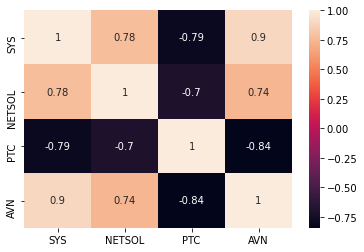

In [18]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

corr = (df.dropna()).corr()

sns.heatmap(corr, annot = True) # Plotting heatmap

                 SYS    NETSOL       PTC       AVN
Time                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02  0.004267  0.015533 -0.009745 -0.003127
2018-01-03 -0.034121 -0.021107 -0.006813  0.006273
2018-01-04  0.017320  0.029688  0.047256  0.006517
2018-01-05  0.033914  0.024886 -0.017467  0.047016
...              ...       ...       ...       ...
2018-12-24  0.027372 -0.000499 -0.006148  0.015297
2018-12-26 -0.013321  0.007863  0.006186  0.036624
2018-12-27  0.004346 -0.048793 -0.003074  0.006853
2018-12-28 -0.020624 -0.049993 -0.009250 -0.006220
2018-12-31  0.032904 -0.048513 -0.003112 -0.023618

[247 rows x 4 columns]


<AxesSubplot:>

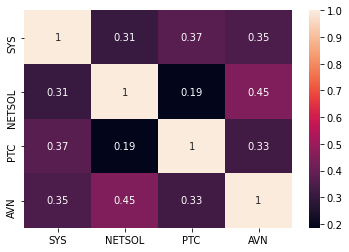

In [19]:
#Correlation with daily returns #
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

all_returns = df.pct_change()
print(all_returns)

corr = (all_returns.dropna()).corr()
sns.heatmap(corr, annot = True)

In [21]:
#Risk #
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
print("Averge daily return of companies\n", avg_daily_return)

daily_risk = ret.std() # Take standard deviation of the daily return of all companies
print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Averge daily return of companies
 SYS       0.001755
NETSOL    0.000897
PTC      -0.001173
AVN       0.003843
dtype: float64

Daily Risk or standard deviation of companies
 SYS       0.020158
NETSOL    0.034407
PTC       0.017892
AVN       0.027037
dtype: float64


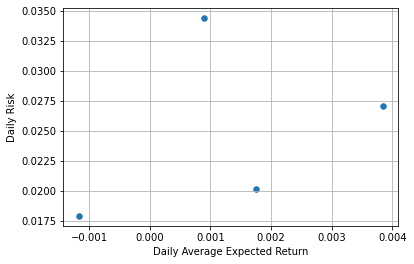

In [22]:
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
daily_risk = ret.std() # Take standard deviation of the daily return of all companies

plt.xlabel("Daily Average Expected Return") # Name the x-axis
plt.ylabel("Daily Risk") # Name the y-axis

plt.grid() # Add grid lines on the plot

plt.scatter(avg_daily_return, daily_risk, s = 30) # Plot the scatter plot for risk & return

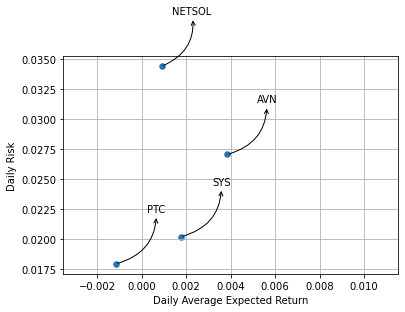

In [23]:
ret = all_returns.dropna()

avg_daily_return = ret.mean()
daily_risk = ret.std()

plt.xlabel("Daily Average Expected Return")
plt.ylabel("Daily Risk")

plt.xlim(ret.mean().min() + ret.mean().min()*2, ret.mean().max() + ret.mean().max()*2)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid()

plt.scatter(avg_daily_return, daily_risk, s = 30)

In [24]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

all_returns = df.pct_change()

investment = 100000

loss = (abs(all_returns.quantile(0.1))) * investment
print(loss)

SYS       2344.682683
NETSOL    4948.152026
PTC       1909.463216
AVN       3163.165179
Name: 0.1, dtype: float64


In [25]:
# MonteCarlo simulations #
# This method uses randomness to solve problems. It converts the randomness in the variables into probability distributions. It then generates a range of future price values in a normal distribution instead of just one value. More detailed information about this can be found here.

# The following is the formula for MonteCarlo simulations:

# S_{t+1}=S_{t}*e^{Drift+Rv}S
# ​t+1
# ​​ =S
# ​t
# ​​ ∗e
# ​Drift+Rv
# ​​ 

# Drift=AveragedDailyReturn-DailyReturnVariance/2Drift=AveragedDailyReturn−DailyReturnVariance/2

# Rv=STD*NORMSINV(RAND())Rv=STD∗NORMSINV(RAND())

In [27]:
#Calculating drift #
# Importing the packages
import numpy as np  
import pandas as pd 



# Preprocessing steps as before
sys = pd.read_csv('SYS.csv')
sys['Time'] = pd.to_datetime(sys.Time)
sys = sys.set_index('Time')

daily_returns = sys['Close'].pct_change() # Calculating daily returns

# Calculating log returns from daily returns
log_returns = np.log(1 + daily_returns)

avg = log_returns.mean() # Calculating average of log returns
var = log_returns.var() # Calculating variance

drift = avg - (var / 2.0) # Calculating drift

drift = np.array(drift) # Convert to array

print("The calculated Drift is:", drift)

The calculated Drift is: 0.001372706735423739


In [29]:
#Calculating Rv #
#In this step, the random values are defined in accordance with the random walk theory.
# Importing the packages
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.stats import norm

# Preprocessing steps as before
sys = pd.read_csv('SYS.csv')
sys['Time'] = pd.to_datetime(sys.Time)
sys = sys.set_index('Time')

daily_returns = sys['Close'].pct_change() # Calculating daily returns
log_returns = np.log(1 + daily_returns) # Calculating log returns from daily returns

avg = log_returns.mean() # Calculating average of log returns
var = log_returns.var() # Calculating variance
drift = avg - (var / 2.0) # Calculating drift
drift = np.array(drift) # Convert to array


pred_price_overDays = 60 # Number of days
pred_count = 10 # Range of prediction

std = log_returns.std() # Calculating STD
std = np.array(std) # Convert to array

x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array

Rv = std * norm.ppf(x) # Calculating Rv

print("The required Rv array is:\n", Rv)

The required Rv array is:
 [[ 2.24271249e-02 -2.59383071e-02 -1.67904131e-02  4.91894409e-02
  -2.91494253e-02 -5.36789190e-03  1.19524606e-02  7.79971213e-03
  -8.20998094e-04  2.05564752e-02]
 [-1.91299930e-02  2.38710716e-02  7.68044544e-04 -2.45104537e-02
   6.45547064e-03  1.93811188e-02 -5.48361882e-03  2.31339648e-02
  -1.08214449e-02 -2.75890813e-02]
 [ 1.16588097e-02  1.93922140e-02 -1.19879246e-02 -2.41217000e-02
  -2.82936475e-02  3.06831658e-02 -4.27994273e-02 -1.89978915e-02
   1.49968078e-02 -2.48304430e-03]
 [-9.01124568e-03  2.29878112e-02  2.41267937e-02  2.59603449e-02
  -3.43676118e-02 -9.28534822e-03  1.34457316e-02 -2.23405674e-03
   1.13089271e-02  5.56795634e-02]
 [ 2.02104307e-02 -1.39324575e-02 -8.61002845e-03  3.87655314e-02
  -1.78878998e-02 -1.35723014e-03 -1.42500612e-02  1.82330874e-03
   3.06707402e-03 -3.12097779e-02]
 [-1.29908712e-03 -5.09993464e-02 -1.43158430e-02  2.27480045e-02
  -2.47207868e-02 -4.06032650e-03 -1.00707527e-02  6.12581397e-03
   3.6

In [30]:
e_value = np.exp(drift + Rv) # Calculating the E value

current_price = sys['Close'].iloc[-1] # Selecting last price of the year

new_prices = np.zeros_like(e_value) # create array to store the results

new_prices[0] = current_price

print(new_prices)

[[109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   

The Minimum Predicted Price: 97.97215337719129
The Maximum Predicted Price: 169.1000383765139

The price array:
 [[109.87       109.87       109.87       109.87       109.87
  109.87       109.87       109.87       109.87       109.87      ]
 [107.93622705 112.6788376  110.10545628 107.35703997 110.73345709
  112.17404903 109.4192612  112.59581187 108.83675624 107.02703586]
 [109.3520046  115.04306629 108.94284448 104.94234547 107.7921769
  115.82814069 104.97898803 110.62867636 110.633023   106.90826567]
 [108.51989714 117.87998913 111.75655422 107.85030061 104.29361894
  114.91525059 106.54619579 110.53342738 112.04496442 113.18497267]
 [110.88755583 116.40870468 110.95065588 112.26727342 102.58533484
  114.9170291  105.18295895 110.88725905 112.54352543 109.85774873]
 [110.89571963 110.77273558 109.52385995 115.00816313 100.2179092
  114.60859049 104.27204009 111.72187474 116.90050285 111.88256245]
 [113.408533   113.90613199 111.73778592 115.29409707  98.86142546
  112.5806627  104

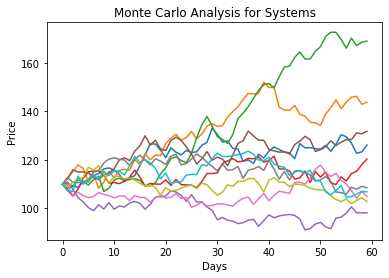

In [31]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price

plt.xlabel('Days') # Assign name to x-axis
plt.ylabel('Price') # Assign name to y-axis
plt.title('Monte Carlo Analysis for Systems') # Assign name to the plot
plt.plot(new_prices)# plot the figure

print("\nThe price array:\n", new_prices)

The Minimum Predicted Price: 97.97215337719129
The Maximum Predicted Price: 169.1000383765139

The price array:
 [[109.87       109.87       109.87       109.87       109.87
  109.87       109.87       109.87       109.87       109.87      ]
 [107.93622705 112.6788376  110.10545628 107.35703997 110.73345709
  112.17404903 109.4192612  112.59581187 108.83675624 107.02703586]
 [109.3520046  115.04306629 108.94284448 104.94234547 107.7921769
  115.82814069 104.97898803 110.62867636 110.633023   106.90826567]
 [108.51989714 117.87998913 111.75655422 107.85030061 104.29361894
  114.91525059 106.54619579 110.53342738 112.04496442 113.18497267]
 [110.88755583 116.40870468 110.95065588 112.26727342 102.58533484
  114.9170291  105.18295895 110.88725905 112.54352543 109.85774873]
 [110.89571963 110.77273558 109.52385995 115.00816313 100.2179092
  114.60859049 104.27204009 111.72187474 116.90050285 111.88256245]
 [113.408533   113.90613199 111.73778592 115.29409707  98.86142546
  112.5806627  104

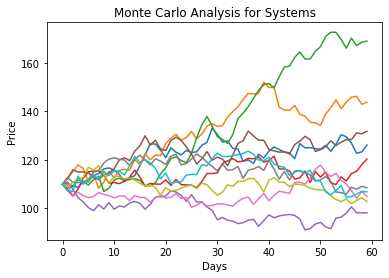

In [32]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price

plt.xlabel('Days') # Assign name to x-axis
plt.ylabel('Price') # Assign name to y-axis
plt.title('Monte Carlo Analysis for Systems') # Assign name to the plot
plt.plot(new_prices)# plot the figure

print("\nThe price array:\n", new_prices)